In [1]:
import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt

data = load_dataset("lukebarousse/data_jobs")
df = data['train'].to_pandas()

df.drop_duplicates()
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [3]:
df_og = df.copy()

df_da_us = df[(df['job_title_short'] == "Data Analyst") & (df['job_country'] == "United States")].copy()
df_da_us.dropna(subset = "salary_year_avg", inplace = True)

df_da_us.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4350 entries, 109 to 784882
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        4350 non-null   object        
 1   job_title              4350 non-null   object        
 2   job_location           4285 non-null   object        
 3   job_via                4350 non-null   object        
 4   job_schedule_type      4342 non-null   object        
 5   job_work_from_home     4350 non-null   bool          
 6   search_location        4350 non-null   object        
 7   job_posted_date        4350 non-null   datetime64[ns]
 8   job_no_degree_mention  4350 non-null   bool          
 9   job_health_insurance   4350 non-null   bool          
 10  job_country            4350 non-null   object        
 11  salary_rate            4350 non-null   object        
 12  salary_year_avg        4350 non-null   float64       
 13  sala

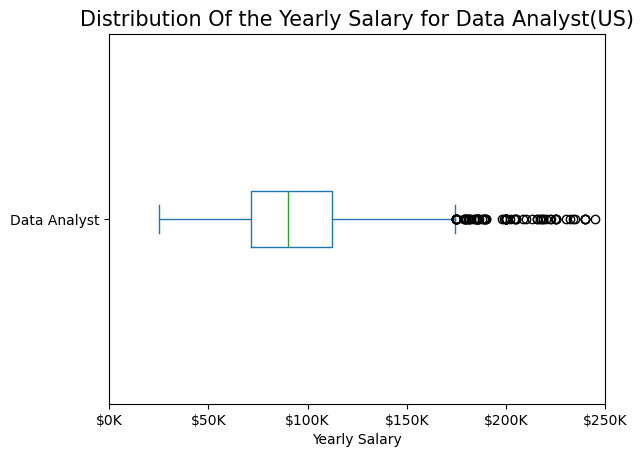

In [8]:
df_da_us.salary_year_avg.plot(kind = "box", vert = False)
plt.xlim(0,250000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos : f'Data Analyst'))
plt.title("Distribution Of the Yearly Salary for Data Analyst(US)", fontsize = 15)
plt.xlabel("Yearly Salary")
plt.show()